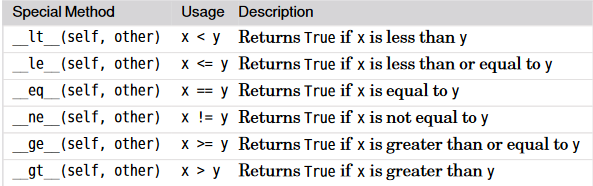

In [1]:
class A:
    pass

class B(A):
    pass

In [2]:
isinstance(B(),A)

True

In [3]:
isinstance(A(),B)

False

In [4]:
p=A()

In [5]:
p.__module__

'__main__'

In [6]:
a='[1,2,3,4]'

In [7]:
a

'[1,2,3,4]'

In [8]:
eval(a)

[1, 2, 3, 4]

In [9]:
import math

class Point:
    
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def distance_from_orgin(self):
        return math.hypot(self.x,self.y)
    
    def __eq__(self,other):
        return self.x==other.x and self.y==other.y
    
    def __repr__(self):
        return 'Point({0.x},{0.y})'.format(self)
    
    def __str__(self):
        return '({0.x},{0.y})'.format(self)
    


In [10]:
Point(1,2)

Point(1,2)

In [11]:
p=Point(3,9)

In [12]:
q=eval(repr(Point(3,9)))

In [13]:
q

Point(3,9)

In [14]:
id(q),id(p)

(2165917179744, 2165917179464)

In [15]:
repr(p)

'Point(3,9)'

In [16]:
print(p)

(3,9)


In [17]:
class Circle(Point):
    
    def __init__(self,radius=0,x=0,y=0):
        
        super().__init__(x,y)
        self.radius=radius
    
    def edge_distance_from_origin(self):
        return abs(self.distance_from_orgin()-self.radius)
    
    def area(self):
        return math.pi*self.radius*self.radius
    
    def circumference(self):
        return math.pi*2*self.radius
    
    def __eq__(self,other):
        return self.radius==other.radius and super.__eq__(other)
    
    def __repr__(self):
        return 'Circle({0.radius},{0.x},{0.y})'.format(self)
    
    def __str__(self):
        return __repr__(self)

In [18]:
c=Circle(1,2,3)

In [19]:
c.distance_from_orgin()

3.605551275463989

In [20]:
p=Point(2,3)

In [21]:
p.distance_from_orgin()

3.605551275463989

In [22]:
class Circle2(Point):
    
    def __init__(self,radius=0,x=0,y=0):
        
        super().__init__(x,y)
        self.radius=radius
    
    def edge_distance_from_origin(self):
        return abs(self.distance_from_orgin()-self.radius)
    
    @property
    def area(self):
        return math.pi*self.radius*self.radius
    
    @property
    def circumference(self):
        return math.pi*2*self.radius
    
    def __eq__(self,other):
        return self.radius==other.radius and super.__eq__(other)
    
    def __repr__(self):
        return 'Circle({0.radius},{0.x},{0.y})'.format(self)
    
    def __str__(self):
        return __repr__(self)

In [23]:
Circle2(1,2,3).area

3.141592653589793

In [24]:
class Circle3(Point):
    
    def __init__(self,radius=0,x=0,y=0):
        
        super().__init__(x,y)
        self.radius=radius
    
    @property
    def radius(self):
        return self.__radius
    
    @radius.setter
    def radius(self,radius):
        
        assert radius>0,'radius must be nonzero and non-negative'
        self.__radius=radius

In [25]:
circle=Circle3(1,1,2)

In [26]:
circle.radius

1

In [27]:
circle.radius=-1

AssertionError: radius must be nonzero and non-negative

In [28]:
class P:
    
    def __init__(self,x):
        self.x=x
    
    @property
    def x(self):
        return self.__x
    
    @x.setter
    def x(self,x):
        if x<0:
            self.__x=0
        elif x>1000:
            self.__x=1000
        else:
            self.__x=x

In [29]:
p_test=P(1)

In [30]:
p_test.x

1

In [31]:
p_test.x=2

In [32]:
p_test.x

2

In [96]:
class FuzzyBool:
    
    def __init__(self,value=0.0):
        self.__value=value if value>=0 and value<=1.0 else 0.0
        self.x=value
    
    def __invert__(self):
        return FuzzyBool(1.0-self.__value)
    
    def __and__(self,other):
        return FuzzyBool(min(self.__value,other.__value))
    
    def __iand__(self,other):
        self.__value=min(self.__value,other.__value)
        return self
    
    def __str__(self):
        return str(self.__value)
    
    def __bool__(self):
        return True if self.__value>0.5 else False
    
    def __int__(self):
        return round(self.__value)
    
    def __float__(self):
        return self.__value
    
    def __lt__(self,other):
        return self.__value<other.__value
    
    def __eq__(self,other):
        return self.__value==other.__value
    
    def __hash__(self):
        return hash(id(self))
    
    def __format__(self,format_spec):
        return format(self.__value,format_spec)
    
    @staticmethod
    def conjunction(*fuzzies):
        return FuzzyBool(min([float(x) for x in fuzzies]))

In [86]:
a=FuzzyBool(1.0)

In [87]:
b=FuzzyBool(2.0)

In [60]:
a&=b

In [61]:
type(a)

__main__.FuzzyBool

In [62]:
a.__class__

__main__.FuzzyBool

In [63]:
FuzzyBool.__name__

'FuzzyBool'

All objects have some special attributes automatically supplied by Python, one of which is called `__class__`, a reference to the object’s class. All classeshave a private `__name__` attribute, again provided automatically. We have used these attributes to provide the class name used for the representation form.

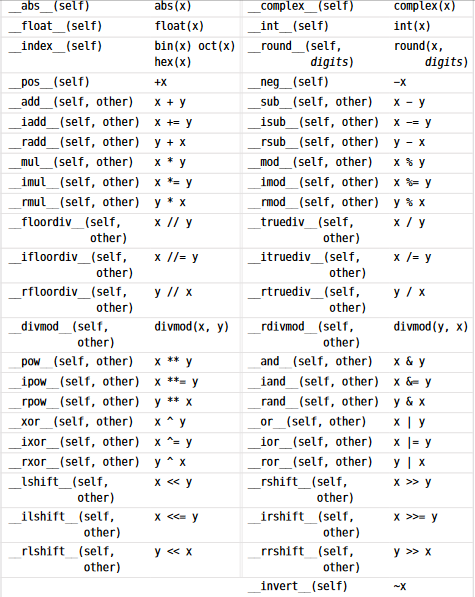

By default, instances of custom classes support operator `==` (which always returns `False`), and are hashable (so can be dictionary keys and can be added to sets). But if we reimplement the `__eq__()` special method to provide proper equality testing, instances are no longer hashable. This can be fixed by providing a `__hash__()` special method as we have done here.

In [64]:
print(format(123.4567, "^-09.3f"))

0123.4570


In [65]:
'{0}'.format(a)

'0.0'

In [68]:
mat='{:20}\t{:28}\t{:32}'

In [69]:
print(mat.format('占4个长度','占8个长度','占12个长度'))

占4个长度               	占8个长度                       	占12个长度                          


可以指定所需长度的字符串的对齐方式：`<`（默认）左对齐，`>`右对齐，`^`中间对齐

In [70]:
print('1:\t|{0:10},'.format('wangyu'))

1:	|wangyu    ,


In [71]:
print('1:\t|{0:^10},'.format('wangyu'))

1:	|  wangyu  ,


In [74]:
print('1:\t|{0:>{1}},'.format('wangyu',10))

1:	|    wangyu,


In [75]:
print('2:\t|{0:4.2f}'.format(3.1415926))

2:	|3.14


In [76]:
print('2:\t|{0:{1}f}'.format(3.1415926,4.2))

2:	|3.14


In [78]:
print('3:\t|',format(3.1415926,'<10.2f'))

3:	| 3.14      


In [79]:
print('4:\t|{0:<10},{1:15}'.format('wangyu',3.1415926))

4:	|wangyu    ,      3.1415926


In [81]:
print('3:',format(3.1415926,'<10.2f'),sep='')

3:3.14      


In [89]:
c=FuzzyBool.conjunction(a,b)

In [90]:
str(c)

'0.0'

In [99]:
a.__dict__

{'_FuzzyBool__value': 1.0}

In [100]:
a.__dir__

<function FuzzyBool.__dir__()>

In [101]:
dir(a)

['_FuzzyBool__value',
 '__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__float__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conjunction']

In [102]:
dir(FuzzyBool)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__float__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conjunction']

## Return values from dir()

The `dir()` tries to return a list of valid attributes of the object.
- If the object has `__dir__()` method, the method will be called and must return the list of attributes.
- If the object doesn't have `__dir__()` method, this method tries to find information from the `__dict__` attribute (if defined), and from type object. In this case, the list returned from dir() may not be complete.

If object is not passed to the `dir()` method, it returns the list of names in the current local scope.

In [103]:
dir()

['A',
 'B',
 'Circle',
 'Circle2',
 'Circle3',
 'FuzzyBool',
 'In',
 'Out',
 'P',
 'Point',
 '_',
 '_10',
 '_100',
 '_101',
 '_102',
 '_13',
 '_14',
 '_15',
 '_19',
 '_2',
 '_21',
 '_23',
 '_26',
 '_3',
 '_30',
 '_32',
 '_37',
 '_38',
 '_39',
 '_45',
 '_46',
 '_47',
 '_49',
 '_5',
 '_61',
 '_62',
 '_63',
 '_65',
 '_7',
 '_8',
 '_88',
 '_90',
 '_94',
 '_97',
 '_99',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i103',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56

In [104]:
f=FuzzyBool(1.0)

In [105]:
f.a

AttributeError: 'FuzzyBool' object has no attribute 'a'

In [106]:
FuzzyBool.a=1

In [107]:
FuzzyBool.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.FuzzyBool.__init__(self, value=0.0)>,
              '__invert__': <function __main__.FuzzyBool.__invert__(self)>,
              '__and__': <function __main__.FuzzyBool.__and__(self, other)>,
              '__iand__': <function __main__.FuzzyBool.__iand__(self, other)>,
              '__str__': <function __main__.FuzzyBool.__str__(self)>,
              '__bool__': <function __main__.FuzzyBool.__bool__(self)>,
              '__int__': <function __main__.FuzzyBool.__int__(self)>,
              '__float__': <function __main__.FuzzyBool.__float__(self)>,
              '__lt__': <function __main__.FuzzyBool.__lt__(self, other)>,
              '__eq__': <function __main__.FuzzyBool.__eq__(self, other)>,
              '__hash__': <function __main__.FuzzyBool.__hash__(self)>,
              '__format__': <function __main__.FuzzyBool.__format__(self, format_spec)>,
              'conjunction': <staticmethod at 0x

In [108]:
f.__dict__

{'_FuzzyBool__value': 1.0, 'x': 1.0}

In [111]:
FuzzyBool(2.0).__dict__

{'_FuzzyBool__value': 0.0, 'x': 2.0}

In [112]:
class Employee:
    
    def __init__(self,name,salary):
        self.name=name
        self.salary=salary
    
    def __new__(cls,name,salary):
        if 0<salary and salary<10000:
            return super().__new__(cls)
        
        else:
            return None

In [113]:
Employee(1,2,)

In [114]:
Employee(1,200000000000)

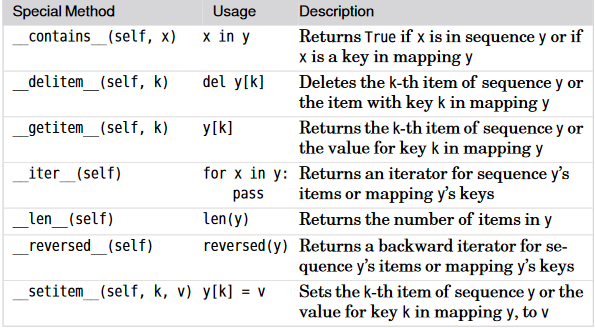